In [77]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Define the path to your MOT file
file_path = '/Users/anqizhou/CAJAL_OpenCap/OpenCap/OpenCapData_7d08fc5c-283e-4521-a8e4-4fd53b8d95af_Seidi/OpenSimData/Kinematics/SWS_01.mot'
# Read the file into a DataFrame (space-delimited example)
df = pd.read_csv(file_path, delim_whitespace=True, skiprows=10)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA to reduce the data to 2 or 3 components (for trajectory visualization)
pca = PCA(n_components=3)  # You can use 2 for 2D plot, or 3 for 3D plot
principal_components = pca.fit_transform(df_scaled)
loadings = pca.components_

# Create a DataFrame of the principal components
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])

/var/folders/jt/2d34l4_56p77x5t1814hvn2w0000gn/T/ipykernel_47479/4192115248.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, skiprows=10)


In [82]:
original_feature_vector = []
for i in range(len(np.array(df_pca))):
    pca_point = np.array(df_pca)[i]  # Let's say we want to extract the original feature vector for the 5th row in PCA space
    original_feature_vector.append(pca.inverse_transform([pca_point]))

In [83]:
original_feature_vector = np.array(original_feature_vector)

In [86]:
# Step 2: Select a colormap
colormap = cm.viridis  # You can change this to other colormaps, e.g., 'plasma', 'inferno'

# Step 3: Map the normalized values to colors
colors = colormap(original_feature_vector[:,:,0])

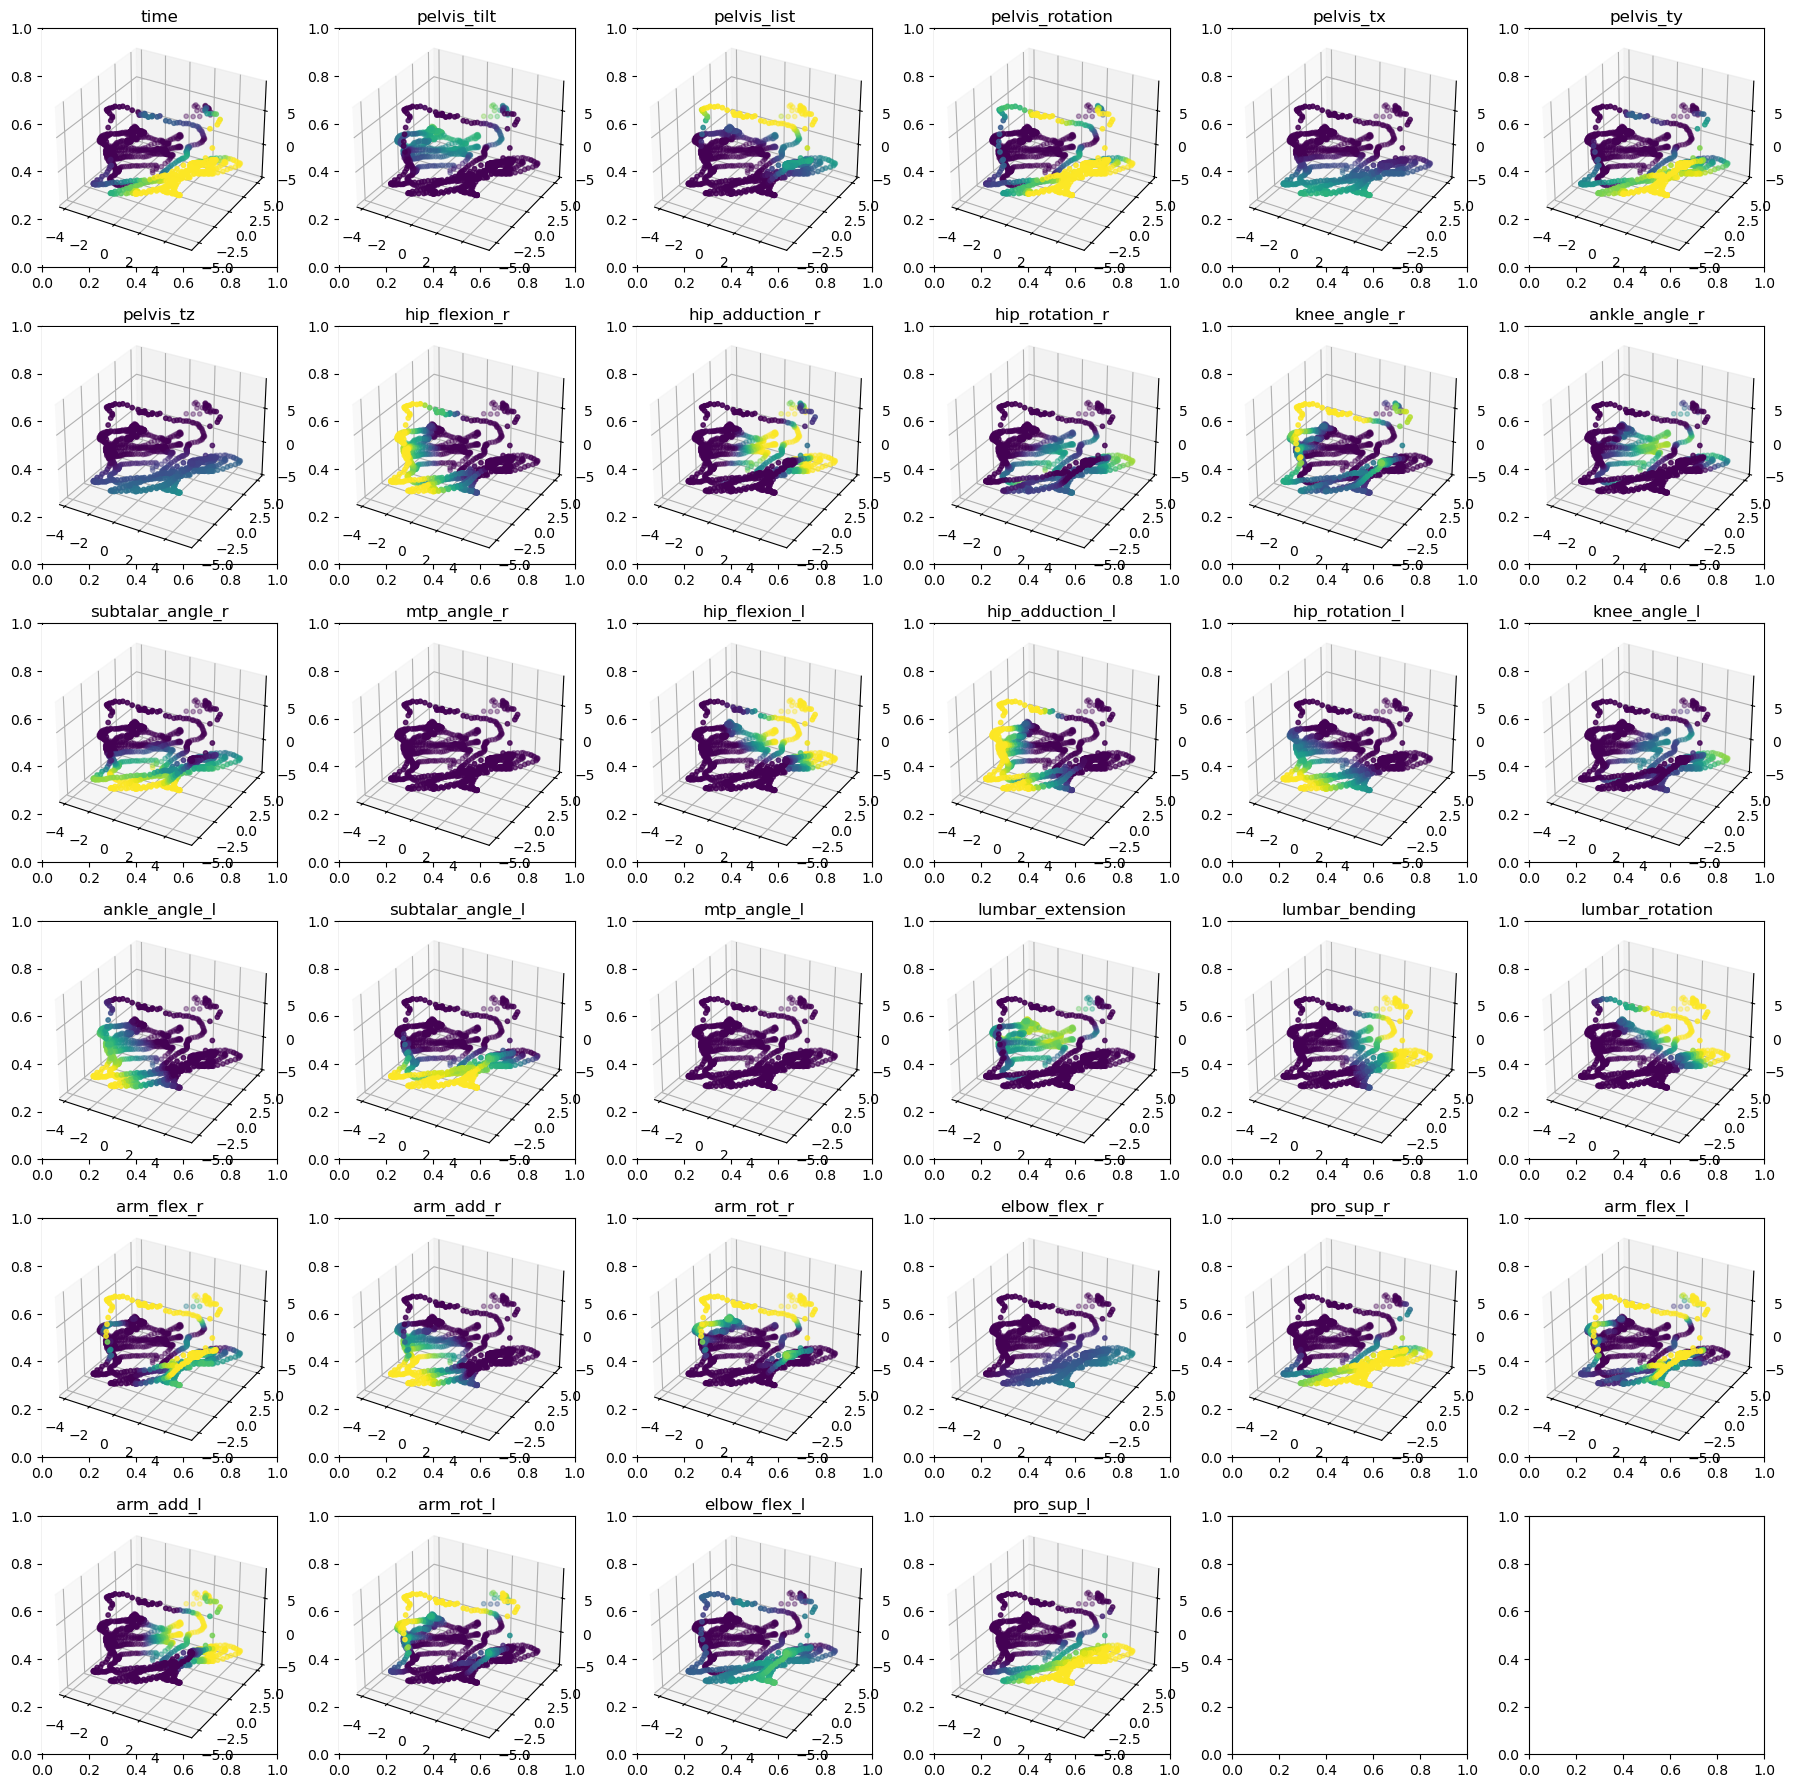

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 6x6 grid of subplots (36 subplots)
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(18, 18))
axes = axes.flat
# Loop through each subplot and create a 3D scatter plot
for i in range(original_feature_vector.shape[-1]):
    ax = axes[i]
    # Generate random data for the scatter plot
    x = df_pca['PC1']
    y = df_pca['PC2']
    z = df_pca['PC3']
    
    # Add a 3D subplot
    ax = fig.add_subplot(6, 6, i+1, projection='3d')
    # Create the 3D scatter plot in the current axis
    scatter = ax.scatter(x, y, z, c=colormap(original_feature_vector[:,:,i]), s=10)

    # Set title for each subplot
    ax.set_title(df.columns[i])
    
    # Set axis labels
    #ax.set_xlabel('X Axis')
    #ax.set_ylabel('Y Axis')
    #ax.set_zlabel('Z Axis')

# Adjust layout to make sure plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

In [90]:
df.columns[i]

'pro_sup_l'

/var/folders/jt/2d34l4_56p77x5t1814hvn2w0000gn/T/ipykernel_47479/2126090809.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(4, 3))


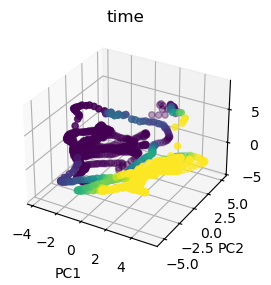

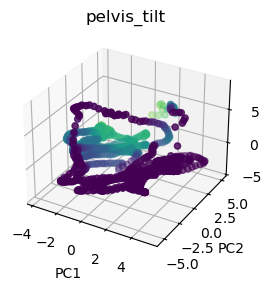

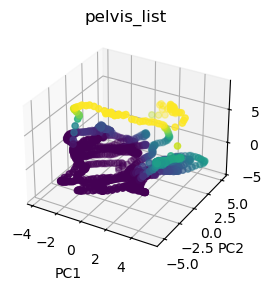

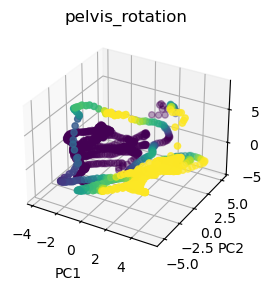

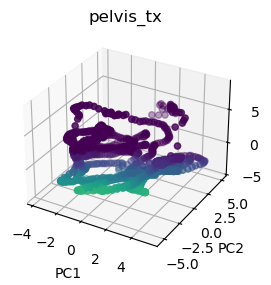

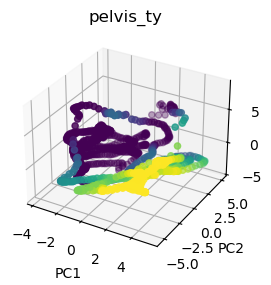

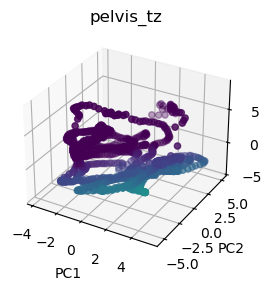

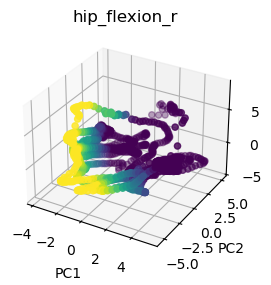

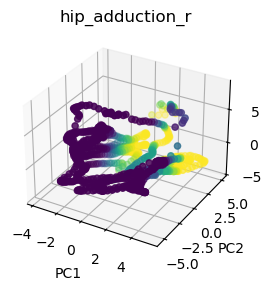

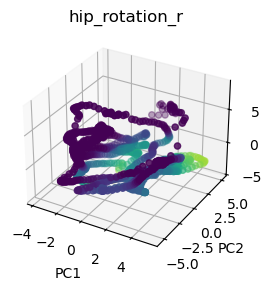

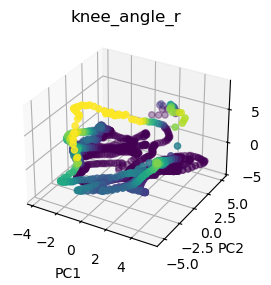

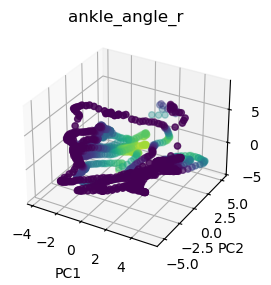

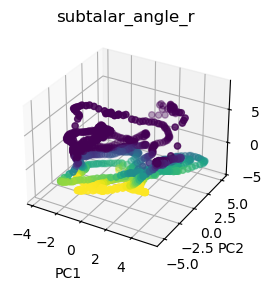

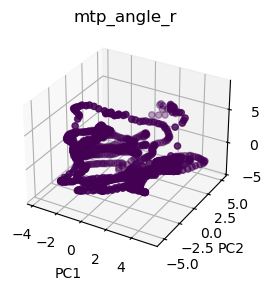

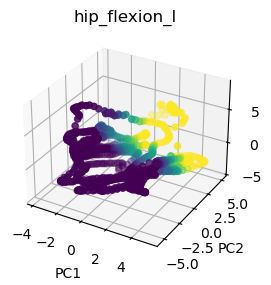

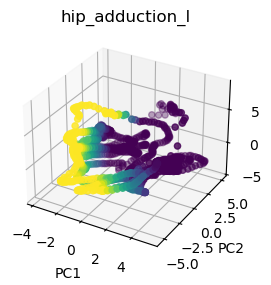

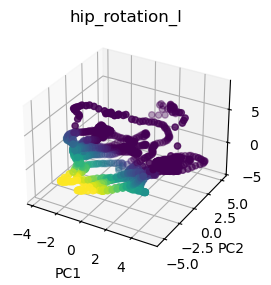

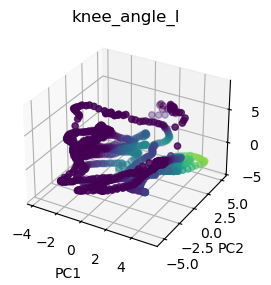

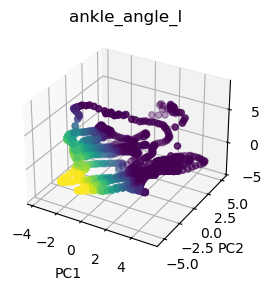

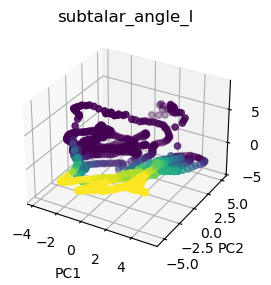

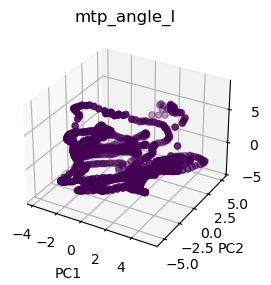

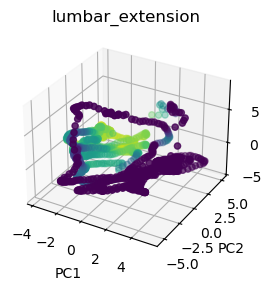

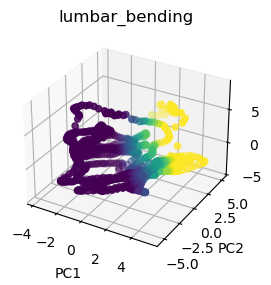

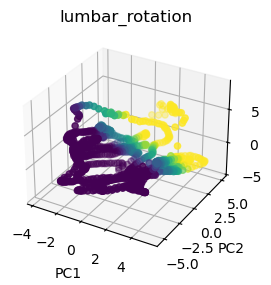

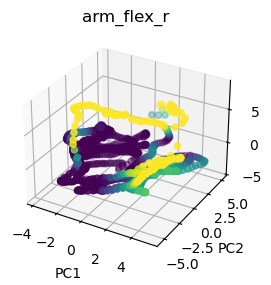

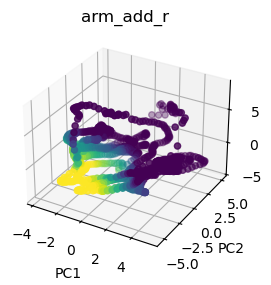

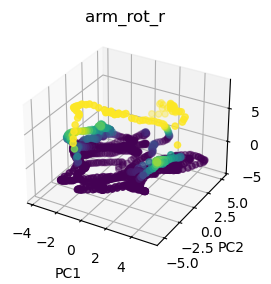

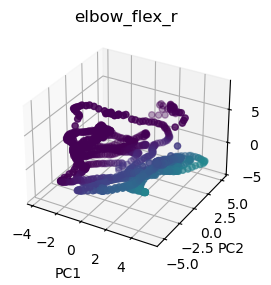

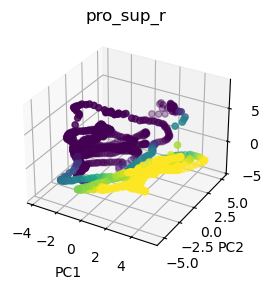

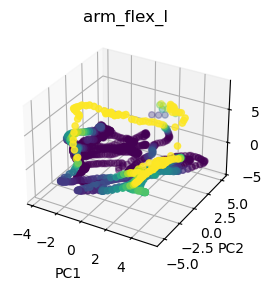

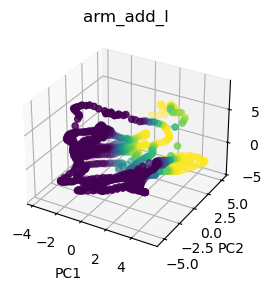

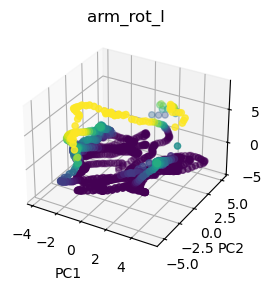

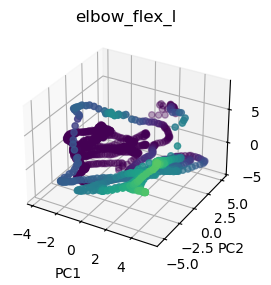

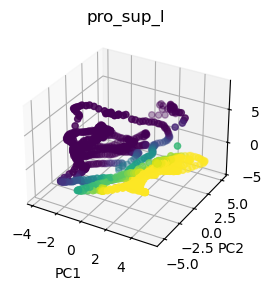

In [113]:
from mpl_toolkits.mplot3d import Axes3D

for i in range(original_feature_vector.shape[-1]):
    # Create a figure
    fig = plt.figure(figsize=(4, 3))
    # Add a 3D subplot (axes)
    ax = fig.add_subplot(111, projection='3d')

    # Create a 3D scatter plot
    ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=colormap(original_feature_vector[:,:,i]))

    # Set labels for the axes
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

    # Set a title
    ax.set_title(df.columns[i])
    plt.savefig(f'plots/{df.columns[i]}.png', format='png')

In [84]:
df_pca['PC1'][0]

-1.4450177491272684